
# Background

Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Content
The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.

Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


# Imports

In [1]:
# Standard data analysis and wrangling libraries
import pandas as pd
import numpy as np


# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Various ML models
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Loading Data

In [2]:
df_raw = pd.read_csv("C:/Users/Andre/Downloads/Train.csv")
df_raw.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
#Getting the size of the data
df_raw.shape

(10999, 12)

In [4]:
#Gettin the columns name
df_raw.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [5]:
#General information of the dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Data Treatment

The data will be processed. We will check if data is missing (NaN), and if so, we will analyze whether we will exclude the entire column or just the missing data so as not to compromise the final analysis


In [6]:
#We will delete the "ID" and "Gender" columns, as it will not affect our analysis at the end. To know the ID of each line, just do the simple operation: line + 1

#Just type 'df_new = df_raw.drop(columns=['ID', 'Gender'])'

df_new = df_raw.drop(columns=['ID', 'Gender'])

In [7]:
df_new.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#As shown above, the dataset doesn't have missing values


In [9]:
#Analysing the data on each column

for i in df_new.columns:
 print(df_new[i].value_counts().sort_values(ascending=False))
 print()


F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

245    110
257    109
260    106
254    101
243    100
      ... 
107      5
99       5
120      5
96       5
122      4
Name: Cost_of_the_Product, Length: 215, dtype: int64

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

10    860
2     858
6     849
9     845
7     840
     ... 
65     36
26     36
42     35
30     34
25     34
Name: Discount_offered, Length: 65, dtype: int64

4883    12
4741    10
5783    10
4314    10
5672    10
        ..
3651     1
3723     1
5848     

In [10]:
#The data presents reliable information


# EDA (Exploratory Data Analysis)


In [11]:
df_new.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1800 with 0 Axes>

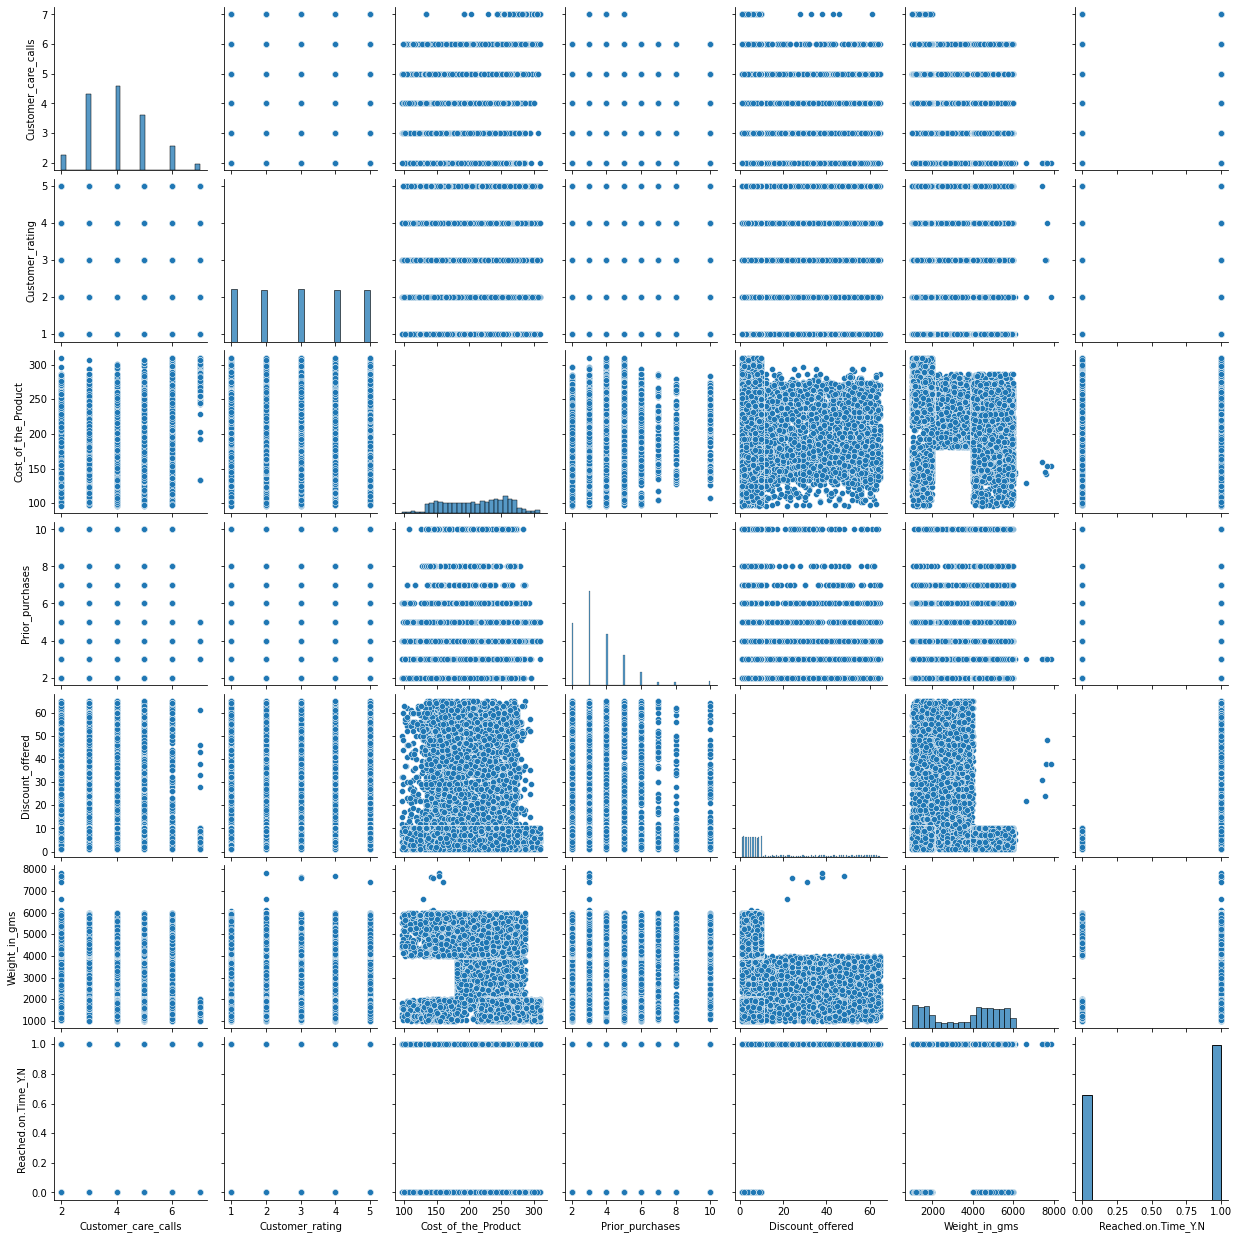

In [12]:
#Relationship between the nunmerical attributes
plt.figure(figsize=(20,25))
ax = sns.pairplot(df_new)
plt.show

c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Density'>

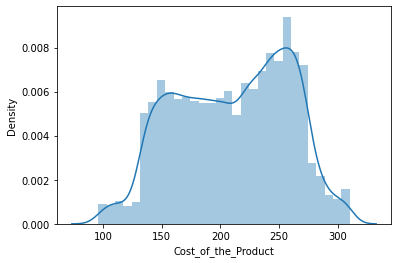

In [13]:
sns.distplot(df_new['Cost_of_the_Product'])

c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

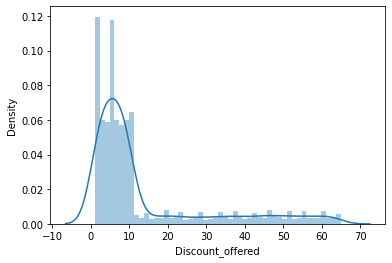

In [14]:
sns.distplot(df_new['Discount_offered'])

c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

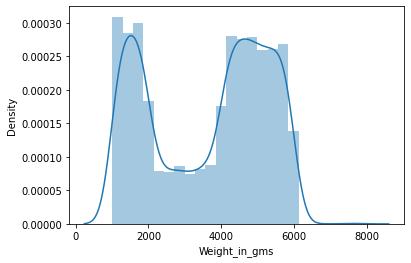

In [15]:
sns.distplot(df_new['Weight_in_gms'])

In [16]:
#Outliers: Ploting some boxplot's to analyze if there's some outliers 

<function matplotlib.pyplot.show(close=None, block=None)>

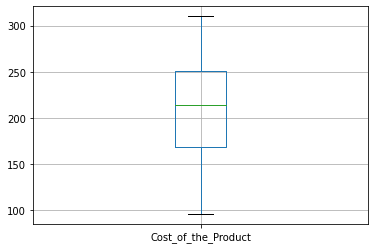

In [17]:
df_new.boxplot(column=['Cost_of_the_Product'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

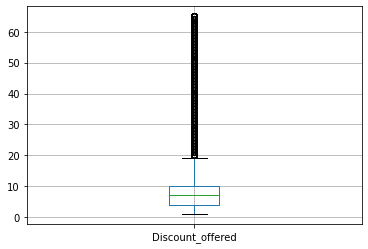

In [18]:
df_new.boxplot(column='Discount_offered')
plt.show

#This variable has a significant number of outliers. 
#The best decision is to keep them because deleting them will compromise the performance of the entire dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

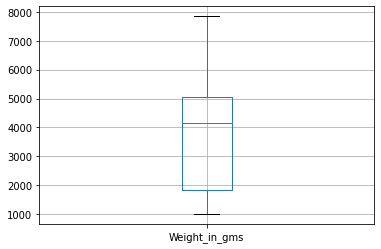

In [19]:
df_new.boxplot(column='Weight_in_gms')
plt.show

<AxesSubplot:title={'center':'Correlation Matrix'}>

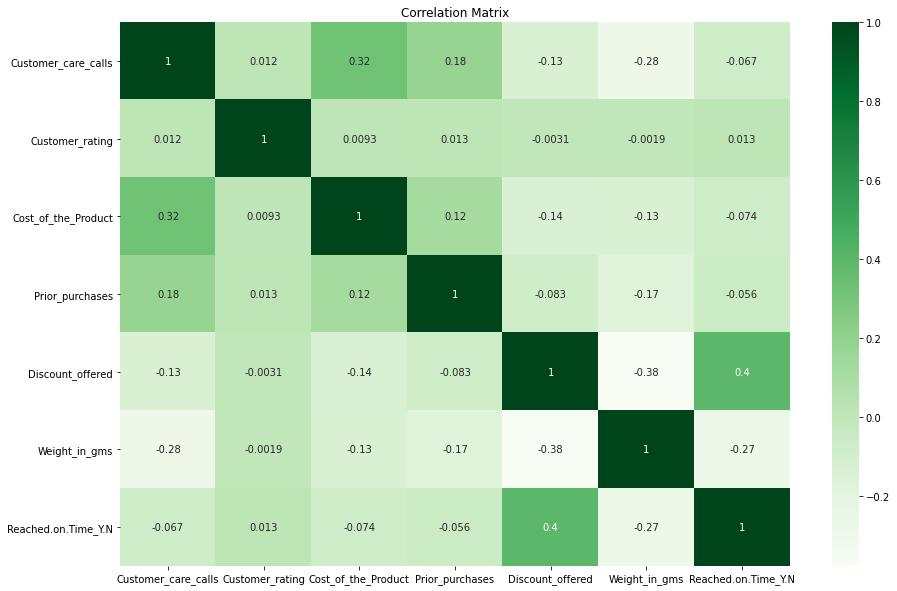

In [20]:
#See the correlation between the features and decide whether to keep all the features we have
plt.figure(figsize=(15,10))
plt.title("Correlation Matrix")
sns.heatmap(df_new.corr(), annot=True, cmap='Greens')

In [21]:
#Getting the categorical attributes
categorical_attributes = df_new.select_dtypes(include=['object']).columns
categorical_attributes


Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'], dtype='object')

In [22]:
#Getting the numerical attributes
numerical_attributes = list(df_new.select_dtypes(include=['float64', 'int64']).columns)
numerical_attributes

['Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

# *** 
Relationship between the numerical attributes. The analysis and graphical demonstrations include variables such as: 

"Cost_of_the_Product", "Discount_offered", "Weight_in_gms" and others will not be done because they contain many samples and would be unfeasible to be analyzed and demonstrated graphically


c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

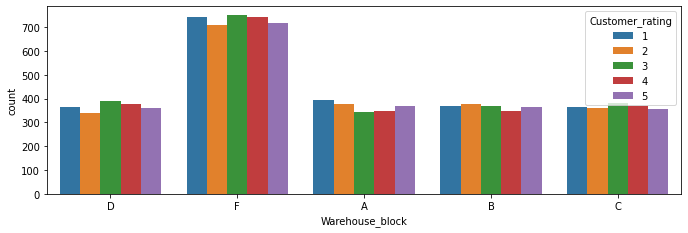

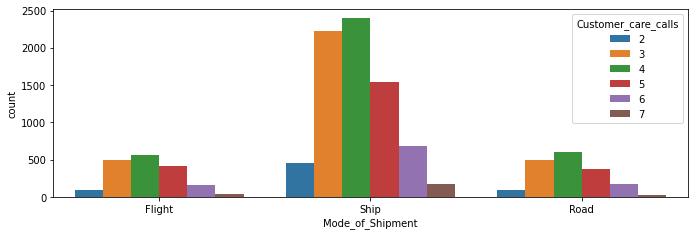

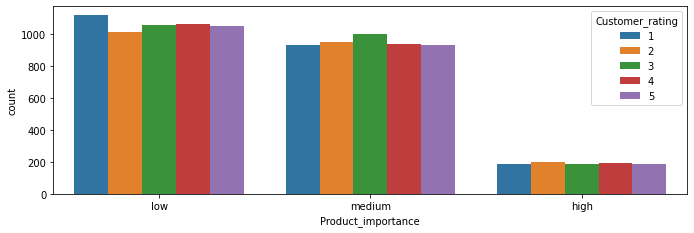

In [23]:
plt.figure(figsize=(25, 20))
plt.subplot(5,2,1)
sns.countplot(df_new[categorical_attributes[0]], hue = df_new['Customer_rating'])


plt.figure(figsize=(25, 20))
plt.subplot(5,2,1)
sns.countplot(df_new[categorical_attributes[1]], hue = df_new['Customer_care_calls'])


plt.figure(figsize=(25, 20))
plt.subplot(5,2,1)
sns.countplot(df_new[categorical_attributes[2]], hue = df_new['Customer_rating'])

# ***
-The warehouses have the evaluations distributed equally from 1 to 5 by the customers, however, we saw that the number of occurrences for warehouse F stands out under the others;

-The number of customer calls for products from warehouse F stands out under the other warehouses (for some reasom, they may be being in demand more often than the others warehouses or they have more products for example);

-The number of evaluations in relation to the mode of submission is balanced (from 1 to 5 for all categories);

-The number of calls from customers in relation to the most widely used mode of delivery in relation to others is by ship;

-It is notice that products which were categorized by "low" and "medium" are being purchased much more often than the "high product importance", but, all of them have a proportional and equally customer rating


# Encoding
We need to adjust the features to facilitate the work of the future model (features of the category, true and false, etc.)

-Features of True or False Values, we will replace True with 1 and False with 0

-Features of Category (features in which the column values are text) we will use the method of encoding dummies variables

*As the database does not have Boolean variables, we will just create the dummies variables


In [25]:
df_code = df_new.copy()

In [26]:
columns_categories = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
df_code = pd.get_dummies(data=df_code, columns=columns_categories)
display(df_code.head())

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


# Context
The problem is that as the topic of data analysis is currently gaining notoriety in the corporate world, consequently, the term "Machine Learning" is one of the most famous when it comes to this. However, many companies think that the Machine Learning algorithm will bring all the solutions to their problems, being that it is just a tool that will "facilitate" the way. In this case, there is no target variable to be studied, we will analyze each case on a case-by-case basis.

# Forecast Model

For Regression Models, we will use the R² here that will tell us how well our model can explain the price. That would be a great parameter to see how good our model is;

-The closer to 100%, the better;

The Mean Square Error will also be calculated, which will show people how much our model is doing wrong;

-The smaller the error, the better;

And for Classifier Models, we will use the Accuracy Score.


In [27]:
def evaluate_model_1(model_name, y_test, prediction):
    r2 = r2_score(y_test,prediction)
    RSME = np.sqrt(mean_squared_error(y_test, prediction))
    return f'Model {model_name}:\nR²:{r2:.2%}\nRSME:{RSME:.2f}'

def evaluate_model_2(model_name, y_test, prediction):
    acc = accuracy_score(y_test,prediction)
    return f'Model {model_name}:\nacc:{acc:.2%}'

# Data Preparation

In this section, parameters for the Machine Learning algorithms will be used. The variables X and Y will be declared for 'training' and 'test'.


In [28]:
#Firstly, let's take a look at the variables 'Customer_rating' and 'Customer_care_calls' which are considered discrete variables

In [29]:
model_rf = RandomForestClassifier()
model_rg = LogisticRegression()
model_kn = KNeighborsClassifier()
model_gs = GaussianNB()
model_gb = GradientBoostingClassifier()


models1 = {'RandomForest': model_rf,
          'LogisticRegression':model_rg,
          'KNeighborsClassifier':model_kn,
          'GaussianNB':model_gs,
          'GradientBoostingClassifier':model_gb
         }

#Declaring your Y feature
y = df_code['Customer_rating']

#Declaring our X features
X = df_code.drop(['Customer_rating'], axis = 1)

In [30]:
model_rf = RandomForestClassifier()
model_rg = LogisticRegression()
model_kn = KNeighborsClassifier()
model_gs = GaussianNB()
model_gb = GradientBoostingClassifier()


models2 = {'RandomForest': model_rf,
          'LogisticRegression':model_rg,
          'KNeighborsClassifier':model_kn,
          'GaussianNB':model_gs,
          'GradientBoostingClassifier':model_gb
         }

#Declaring your Y feature
yy = df_code['Customer_care_calls']

#Declaring our X features
XX = df_code.drop(['Customer_care_calls'], axis = 1)

In [31]:
#Now let's look at the continuous variables that had the most notable values in the correlation matrix: 'Cost_of_the_Product', 'Discount_offered' and 'Weight_in_gms'.

In [32]:
model_lr = LinearRegression()
model_ls = Lasso()
model_rd = Ridge()
model_rr = RandomForestRegressor()
model_gr = GradientBoostingRegressor()


models3 = {'LinearRegression': model_lr,
          'Lasso':model_ls,
          'Ridge':model_rd,
          'RandomForestRegressor':model_rr,
          'GradientBoostingRegressor':model_gr
         }

#Declaring your Y feature
y1 = df_code['Cost_of_the_Product']

#Declaring our X features
X1 = df_code.drop(['Cost_of_the_Product'], axis = 1)

In [33]:
model_lr = LinearRegression()
model_ls = Lasso()
model_rd = Ridge()
model_rr = RandomForestRegressor()
model_gr = GradientBoostingRegressor()


models4 = {'LinearRegression': model_lr,
          'Lasso':model_ls,
          'Ridge':model_rd,
          'RandomForestRegressor':model_rr,
          'GradientBoostingRegressor':model_gr
         }

#Declaring your Y feature
y2 = df_code['Discount_offered']

#Declaring our X features
X2 = df_code.drop(['Discount_offered'], axis = 1)

In [34]:
model_lr = LinearRegression()
model_ls = Lasso()
model_rd = Ridge()
model_rr = RandomForestRegressor()
model_gr = GradientBoostingRegressor()


models5 = {'LinearRegression': model_lr,
          'Lasso':model_ls,
          'Ridge':model_rd,
          'RandomForestRegressor':model_rr,
          'GradientBoostingRegressor':model_gr
         }

#Declaring your Y feature
y3 = df_code['Weight_in_gms']

#Declaring our X features
X3 = df_code.drop(['Weight_in_gms'], axis = 1)

# Model Training and Performance

This step is crucial. Artificial Intelligence learns from what we call training.

The information is separated into training and testing. Ex: 10% of the database will be used for testing and 90% for training (usually training is even bigger)

Then, we give the model the training data, he will look at that data and learn to predict prices.

After he learns, you take a test with him, with the test data, to see if it is good or not. Analyzing the test data you discover the best model.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

for model_name, model in models1.items():
    #train
    model.fit(X_train, y_train)
    #test
    prediction = model.predict(X_test)
    print(evaluate_model_2(model_name, y_test, prediction))

Model RandomForest:
acc:18.95%
Model LogisticRegression:
acc:20.11%
Model KNeighborsClassifier:
acc:20.84%
Model GaussianNB:
acc:19.82%
Model GradientBoostingClassifier:
acc:21.02%


In [36]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, random_state=1000)

for model_name, model in models2.items():
    #train
    model.fit(XX_train, yy_train)
    #test
    prediction = model.predict(XX_test)
    print(evaluate_model_2(model_name, yy_test, prediction))

Model RandomForest:
acc:37.85%


c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model LogisticRegression:
acc:37.24%
Model KNeighborsClassifier:
acc:32.44%
Model GaussianNB:
acc:33.13%
Model GradientBoostingClassifier:
acc:40.69%


In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=20)

for model_name, model in models3.items():
    #train
    model.fit(X1_train, y1_train)
    #test
    prediction = model.predict(X1_test)
    print(evaluate_model_1(model_name, y1_test, prediction))

Model LinearRegression:
R²:13.20%
RSME:45.35
Model Lasso:
R²:13.50%
RSME:45.27
Model Ridge:
R²:13.20%
RSME:45.35
Model RandomForestRegressor:
R²:34.49%
RSME:39.40
Model GradientBoostingRegressor:
R²:37.90%
RSME:38.36


In [38]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=40)

for model_name, model in models4.items():
    #train
    model.fit(X2_train, y2_train)
    #test
    prediction = model.predict(X2_test)
    print(evaluate_model_1(model_name, y2_test, prediction))

Model LinearRegression:
R²:30.42%
RSME:13.50
Model Lasso:
R²:28.35%
RSME:13.70
Model Ridge:
R²:30.42%
RSME:13.50
Model RandomForestRegressor:
R²:56.15%
RSME:10.72
Model GradientBoostingRegressor:
R²:57.55%
RSME:10.54


In [39]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=50)

for model_name, model in models5.items():
    #train
    model.fit(X3_train, y3_train)
    #test
    prediction = model.predict(X3_test)
    print(evaluate_model_1(model_name, y3_test, prediction))

Model LinearRegression:
R²:30.23%
RSME:1357.26
Model Lasso:
R²:30.23%
RSME:1357.30
Model Ridge:
R²:30.23%
RSME:1357.26
Model RandomForestRegressor:
R²:63.76%
RSME:978.25
Model GradientBoostingRegressor:
R²:63.29%
RSME:984.47


# Conclusions

None of the analytical models presented were able to "explain" the variables, so the feature importance table will not be presented as the models presented have a low value of their respective metrics.
. Not because the treatment and analysis of the data are wrong, but because more information is missing so that the desired end result will be optimal.

For example, there were more purchases from warehouse F and more products were shipped via ships. Some questions and thus analyzes that could be made were:

-Does warehouse F have a privileged location over the rest?

-Does warehouse F have more diversified products compared to others?

-Did warehouse F employees receive any specialized training?

-The naval logistics system are more dynamic?

These types of questions we ask but we did not get answers and also the results with low R² values for each model show how poor the correlation of the dataset data is, thus showing that the Machine Learning algorithm will not always solve all the questions and company problems. It is necessary for everyone to understand that for the algorithm to work, there must be a wealth in its dataset.